In [162]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn
import json
from pathlib import Path

In [6]:
valid_results = list(Path("pkl_results/valid").glob("*"))
test_results = list(Path("pkl_results/test").glob("*"))

In [152]:
results = pickle.load(open(valid_results[0],'rb'))

In [158]:
results['STSBenchmark']['dev']['spearman'][0]

0.7631768787338981

In [164]:
valid_results_dict = {int(result.stem.split('step_')[1]):pickle.load(open(result,'rb')) for result in valid_results}
test_results_dict = {int(result.stem.split('step_')[1]):pickle.load(open(result,'rb')) for result in test_results}

In [169]:
def pretty(d, indent=0):
    for key, value in d.items():
        print('\t' * indent + str(key))
        if isinstance(value, dict):
            pretty(value, indent+1)
#         else:
#             print('\t' * (indent+1) + str(value))

In [171]:
pretty(valid_results_dict[3999])

STS12
	MSRpar
		pearson
		spearman
		nsamples
	MSRvid
		pearson
		spearman
		nsamples
	SMTeuroparl
		pearson
		spearman
		nsamples
	surprise.OnWN
		pearson
		spearman
		nsamples
	surprise.SMTnews
		pearson
		spearman
		nsamples
	all
		pearson
			all
			mean
			wmean
		spearman
			all
			mean
			wmean
STS13
	FNWN
		pearson
		spearman
		nsamples
	headlines
		pearson
		spearman
		nsamples
	OnWN
		pearson
		spearman
		nsamples
	all
		pearson
			all
			mean
			wmean
		spearman
			all
			mean
			wmean
STS14
	deft-forum
		pearson
		spearman
		nsamples
	deft-news
		pearson
		spearman
		nsamples
	headlines
		pearson
		spearman
		nsamples
	images
		pearson
		spearman
		nsamples
	OnWN
		pearson
		spearman
		nsamples
	tweet-news
		pearson
		spearman
		nsamples
	all
		pearson
			all
			mean
			wmean
		spearman
			all
			mean
			wmean
STS15
	answers-forums
		pearson
		spearman
		nsamples
	answers-students
		pearson
		spearman
		nsamples
	belief
		pearson
		spearman
		nsamples
	headlines
		pearson
		

In [165]:
print(json.dumps(valid_results_dict,
                  sort_keys=True, indent=4))

{
    "3999": {
        "SICKRelatedness": {
            "all": {
                "pearson": {
                    "all": 0.6773442318489882,
                    "mean": 0.6808830592187592,
                    "wmean": 0.6772922062269104
                },
                "spearman": {
                    "all": 0.6355389268666847,
                    "mean": 0.6397484190999827,
                    "wmean": 0.6355955855803891
                }
            },
            "dev": {
                "nsamples": 500,
                "pearson": [
                    0.6890989301110342,
                    1.155896644234765e-71
                ],
                "spearman": [
                    0.6493409138156981,
                    3.35844258937503e-61
                ]
            },
            "test": {
                "nsamples": 4927,
                "pearson": [
                    0.6743656960314454,
                    0.0
                ],
                "spearman": [
           

## Dataframe

In [250]:
df_valid = pd.concat({int(result.stem.split('step_')[1]):pd.concat({k: pd.DataFrame(v) for k, v in pickle.load(open(result,'rb')).items()}, axis=1) for result in valid_results}).sort_index()

In [251]:
df_test = pd.concat({int(result.stem.split('step_')[1]):pd.concat({k: pd.DataFrame(v) for k, v in pickle.load(open(result,'rb')).items()}, axis=1) for result in test_results}).sort_index()

In [252]:
df_valid.head()

STS12  \
                                                      MSRpar   
3999 nsamples                                            750   
     pearson     (0.4279714383025532, 9.337054815684153e-35)   
     spearman   (0.4502756819657268, 1.0135376392857822e-38)   
7999 nsamples                                            750   
     pearson   (0.43072456867670655, 3.1382562588567514e-35)   

                                                             \
                                                     MSRvid   
3999 nsamples                                           750   
     pearson   (0.7842999115547243, 3.012996565079117e-157)   
     spearman  (0.7767992791942583, 2.244178461147831e-152)   
7999 nsamples                                           750   
     pearson   (0.7852786404427918, 6.742971840721736e-158)   

                                                            \
                                               SMTeuroparl   
3999 nsamples                                          459   
     pearson   (0.5137898745533154, 2.770970484012238e-32)   
     spearman   (0.584103695182422, 2.466532744300358e-43)   
7999 nsamples                                          459   
     pearson   (0.5148094148588597, 1.996593830230155e-32)   

                                                              \
                                               surprise.OnWN   
3999 nsamples                                            750   
     pearson   (0.7017242563801825, 3.0043328484178877e-112)   
     spearman  (0.6807813892507647, 3.1721731566202103e-103)   
7999 nsamples                                            750   
     pearson    (0.7086295011994663, 2.122332710569243e-115)   

                                                             \
                                           surprise.SMTnews   
3999 nsamples                                           399   
     pearson    (0.5772706388020467, 7.879779049552919e-37)   
     spearman   (0.530087589833815, 2.7335262965610016e-30)   
7999 nsamples                                           399   
     pearson   (0.5889861138478658, 1.2676373939523847e-38)   

                                                                  \
                                                             all   
3999 nsamples                                                NaN   
     pearson   {'all': 0.6706203173954044, 'mean': 0.60101122...   
     spearman  {'all': 0.5495184378291017, 'mean': 0.60440952...   
7999 nsamples                                                NaN   
     pearson   {'all': 0.6768759921601368, 'mean': 0.60568564...   

                                                      STS13  \
                                                       FNWN   
3999 nsamples                                           189   
     pearson   (0.5175879779334089, 2.4147203086470624e-14)   
     spearman   (0.5439182814099894, 6.045864594366003e-16)   
7999 nsamples                                           189   
     pearson   (0.5322745493153687, 3.2121855310462606e-15)   

                                                             \
                                                  headlines   
3999 nsamples                                           750   
     pearson    (0.682194740399452, 8.245982566686773e-104)   
     spearman   (0.6678035777204852, 5.289121707518046e-98)   
7999 nsamples                                           750   
     pearson   (0.691310654707618, 1.1512766409381327e-107)   

                                                              \
                                                        OnWN   
3999 nsamples                                            561   
     pearson    (0.7490028179573132, 5.252214741218576e-102)   
     spearman  (0.7481263320455356, 1.2109970140447914e-101)   
7999 nsamples                                            561   
     pearson     (0.758495516689623, 4.921456886969423e-106)   

                            

<AxesSubplot:>

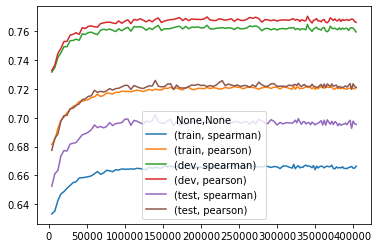

In [284]:
df_valid.swaplevel(0,1).sort_index(0).drop('nsamples',axis=0).loc[['spearman','pearson']].swaplevel(0,1).loc[:,['STSBenchmark']].droplevel(0,axis=1).loc[:,['train','dev','test']].applymap(lambda e: e[0]).unstack(1).plot()
# df_test.swaplevel(0,1).sort_index(0).drop('nsamples',axis=0).loc[['spearman','pearson']].swaplevel(0,1).loc[:,['STSBenchmark']].droplevel(0,axis=1).loc[:,['train','dev','test']].applymap(lambda e: e[0]).unstack(1).plot();

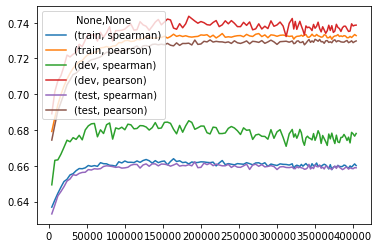

In [297]:
df_valid.swaplevel(0,1).sort_index(0).drop('nsamples',axis=0).loc[['spearman','pearson']].swaplevel(0,1).loc[:,['SICKRelatedness']].droplevel(0,axis=1).loc[:,['train','dev','test']].applymap(lambda e: e[0]).unstack(1).plot();

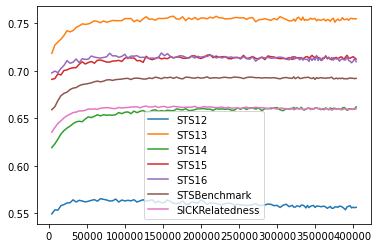

In [314]:
df_valid.swaplevel(0,1).sort_index(0).drop('nsamples',axis=0).loc['spearman',].swaplevel(0,1,axis=1).loc[:,'all'].applymap(lambda e: e['all']).plot();

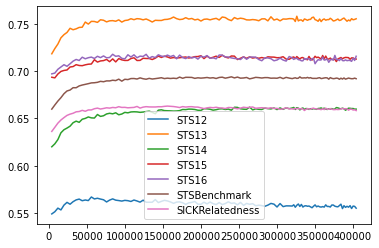

In [315]:
df_test.swaplevel(0,1).sort_index(0).drop('nsamples',axis=0).loc['spearman',].swaplevel(0,1,axis=1).loc[:,'all'].applymap(lambda e: e['all']).plot();

In [ ]:
df_valid.swaplevel(0,1).sort_index(0).drop('nsamples',axis=0).loc['spearman',].swaplevel

In [266]:
df_valid_STSBenchmark = df_valid.swaplevel(0,1).sort_index(0).drop('nsamples',axis=0).loc['pearson'].stack(0).swaplevel(0,1).loc['STSBenchmark',['train','dev','test']].applymap(lambda e: e[0])
df_valid_SICKRelatedness = df_valid.swaplevel(0,1).sort_index(0).drop('nsamples',axis=0).loc['pearson'].stack(0).swaplevel(0,1).loc['SICKRelatedness',['train','dev','test']].applymap(lambda e: e[0])

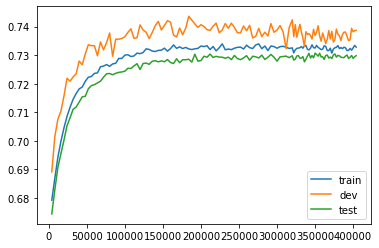

In [263]:
df_valid_SICKRelatedness.plot();

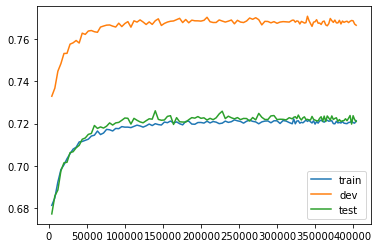

In [264]:
df_valid_STSBenchmark.plot();

In [137]:
df_spearman = df.loc[(slice(None),'spearman'),(slice(None),'all')]

In [138]:
df_pearson = df.loc[(slice(None),'pearson'),(slice(None),'all')]

In [145]:
df1=df_spearman.droplevel(1,axis=0).droplevel(1,axis=1)

In [150]:
df1

,STS12,STS13,STS14,STS15,STS16,STSBenchmark,SICKRelatedness
3999,"{'all': 0.5495184378291017, 'mean': 0.60440952...","{'all': 0.7184730537379419, 'mean': 0.65328273...","{'all': 0.6193106906998436, 'mean': 0.64012751...","{'all': 0.6911217289017173, 'mean': 0.72409706...","{'all': 0.6978681663323789, 'mean': 0.71006318...","{'all': 0.6591638605653842, 'mean': 0.67249520...","{'all': 0.6355389268666847, 'mean': 0.63974841..."
7999,"{'all': 0.5538254649380435, 'mean': 0.60845738...","{'all': 0.7271484651323373, 'mean': 0.66621378...","{'all': 0.623217835120968, 'mean': 0.643121268...","{'all': 0.691944655669346, 'mean': 0.726363731...","{'all': 0.6997877417452316, 'mean': 0.71451313...","{'all': 0.6622874492996489, 'mean': 0.67707716...","{'all': 0.6403927808840476, 'mean': 0.64728913..."
11999,"{'all': 0.5534474871870636, 'mean': 0.60778389...","{'all': 0.7304182262885786, 'mean': 0.66248855...","{'all': 0.6281882677880075, 'mean': 0.64763273...","{'all': 0.6968879204527287, 'mean': 0.73087780...","{'all': 0.6982203614528967, 'mean': 0.71413898...","{'all': 0.6687518011517413, 'mean': 0.68264185...","{'all': 0.6446713734573095, 'mean': 0.65035766..."
15999,"{'all': 0.5582088208000955, 'mean': 0.61197099...","{'all': 0.7333862874354946, 'mean': 0.66555400...","{'all': 0.633517476158175, 'mean': 0.650151519...","{'all': 0.6957926556269127, 'mean': 0.73133248...","{'all': 0.7025723211288994, 'mean': 0.72063770...","{'all': 0.6738414557014404, 'mean': 0.68857897...","{'all': 0.6474825404230773, 'mean': 0.65334412..."
19999,"{'all': 0.5593334861542153, 'mean': 0.61125705...","{'all': 0.7372564768977695, 'mean': 0.66893885...","{'all': 0.637205494545888, 'mean': 0.652816207...","{'all': 0.7004556914804035, 'mean': 0.73606242...","{'all': 0.705771705909912, 'mean': 0.720744444...","{'all': 0.6763517419501286, 'mean': 0.69181149...","{'all': 0.6505795862706722, 'mean': 0.65658692..."
...,...,...,...,...,...,...,...
395999,"{'all': 0.558097433075724, 'mean': 0.611091054...","{'all': 0.7550698778960279, 'mean': 0.67816574...","{'all': 0.660061591892362, 'mean': 0.665933571...","{'all': 0.7133393805787296, 'mean': 0.74797963...","{'all': 0.7102133506756507, 'mean': 0.72741304...","{'all': 0.6926310809841311, 'mean': 0.70878159...","{'all': 0.6597761073391538, 'mean': 0.66386609..."
397999,"{'all': 0.5558558368304866, 'mean': 0.61425855...","{'all': 0.7553059795736783, 'mean': 0.68122273...","{'all': 0.6600273085242128, 'mean': 0.66615295...","{'all': 0.7142245285913467, 'mean': 0.74780332...","{'all': 0.70855310388449, 'mean': 0.7260385351...","{'all': 0.6922299669166786, 'mean': 0.70715528...","{'all': 0.6595183196973747, 'mean': 0.66546271..."
399999,"{'all': 0.5565561548999811, 'mean': 0.61103409...","{'all': 0.754767279255043, 'mean': 0.674088374...","{'all': 0.6596507011114162, 'mean': 0.66651693...","{'all': 0.7149940620767535, 'mean': 0.74962618...","{'all': 0.7101030229108792, 'mean': 0.72755074...","{'all': 0.6922554036545366, 'mean': 0.70834208...","{'all': 0.6598615706654, 'mean': 0.66543676005..."
401999,"{'all': 0.5561191524387556, 'mean': 0.61126082...","{'all': 0.7549675887006164, 'mean': 0.67792086...","{'all': 0.659769451155446, 'mean': 0.666224905...","{'all': 0.7137997098248734, 'mean': 0.74852765...","{'all': 0.7132011681037751, 'mean': 0.73014566...","{'all': 0.6918332383056511, 'mean': 0.70732795...","{'all': 0.6605593995169784, 'mean': 0.66550712..."


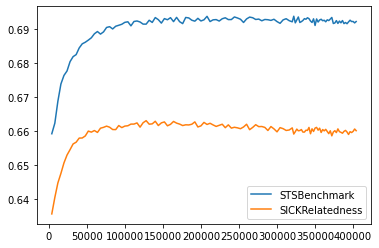

In [174]:
df1.loc[:,['STSBenchmark','SICKRelatedness']].applymap(lambda e: e['all']).plot();